In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, probplot, mannwhitneyu, chi2_contingency

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder,MentalHealth
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Medium
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low


In [ ]:
#For data included in database Mean was calculated for SleepDuration, QualityOfSLeep, StressLevel and PhysicalActivityLevel

In [3]:
meanValueSleepDuration = df['SleepDuration'].mean()
meanValueQualityofSleep = df['QualityofSleep'].mean()
meanValueStressLevel = df['StressLevel'].mean()
meanValuePhysicalActivityLevel = df['PhysicalActivityLevel'].mean()

print(f"Average Sleep Duration: {round(meanValueSleepDuration)} h.")
print(f"Average Quality of Sleep: {round(meanValueQualityofSleep)}.")
print(f"Average Stress Level: {round(meanValueStressLevel)}.")
print(f"Average Physical Activity Level: {round(meanValuePhysicalActivityLevel)}.")


Average Sleep Duration: 7 h.
Average Quality of Sleep: 7.
Average Stress Level: 5.
Average Physical Activity Level: 59.


In [47]:
#For data included in database Median was calculated for SleepDuration, QualityOfSLeep, StressLevel and PhysicalActivityLevel

In [4]:
medianValueSleepDuration = df['SleepDuration'].median()
medianValueQualityofSleep = df['QualityofSleep'].median()
medianValueStressLevel = df['StressLevel'].median()
medianValuePhysicalActivityLevel = df['PhysicalActivityLevel'].median()

print(f"Median for Sleep Duration: {round(medianValueSleepDuration)} h.")
print(f"Median for Quality of Sleep: {round(medianValueQualityofSleep)}.")
print(f"Median for Stress Level: {round(medianValueStressLevel)}.")
print(f"Median for Physical Activity Level: {round(medianValuePhysicalActivityLevel)}.")


Median for Sleep Duration: 7 h.
Median for Quality of Sleep: 7.
Median for Stress Level: 5.
Median for Physical Activity Level: 60.


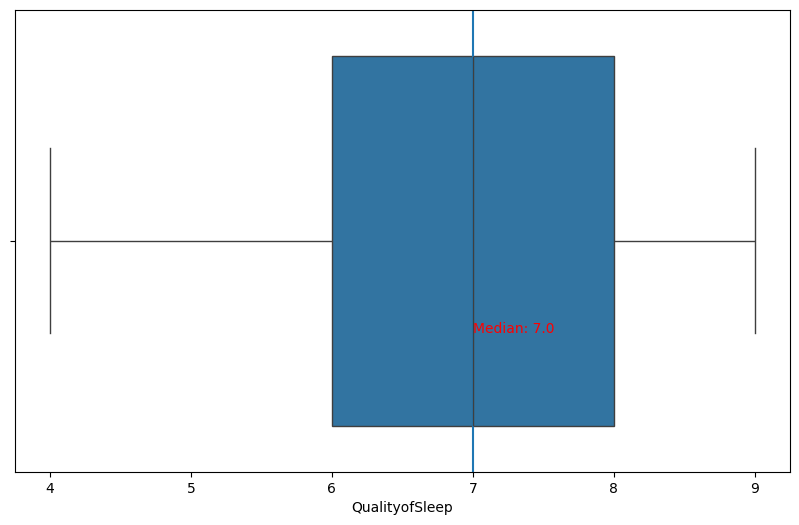

In [59]:
#Median for one value as an example presented below

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['QualityofSleep'])

median_value = df['QualityofSleep'].median()
plt.axvline(median_value)
plt.text(median_value, 0.2, f'Median: {median_value}', color='r')

plt.xlabel('QualityofSleep')
plt.show()

In [ ]:
#For data included in database Mode was calculated for SleepDuration, QualityOfSLeep, StressLevel and PhysicalActivityLevel

In [5]:
modeSleepDuration = df['SleepDuration'].value_counts()
modeQualityOfSleep = df['QualityofSleep'].value_counts()
modeStressLevel = df['StressLevel'].value_counts()
modePhysicalActivityLevel = df['PhysicalActivityLevel'].value_counts()

print(f"Sleep Duration mode: {max(modeSleepDuration)}")
print(f"Quality of Sleep mode: {max(modeQualityOfSleep)}")
print(f"Stress Level mode: {max(modeStressLevel)}")
print(f"Physical Activity Level mode: {max(modePhysicalActivityLevel)}")

Sleep Duration mode: 36
Quality of Sleep mode: 109
Stress Level mode: 71
Physical Activity Level mode: 70


In [6]:
varianceSleepDuration = df['SleepDuration'].var()
print(f"Variance of Sleep DUartion: {varianceSleepDuration}")


Variance of Sleep DUartion: 0.6330696334102738


In [65]:
# The result is 0.633 which is a relatively small value. Sleep durations tend to be close to the mean sleep duration.

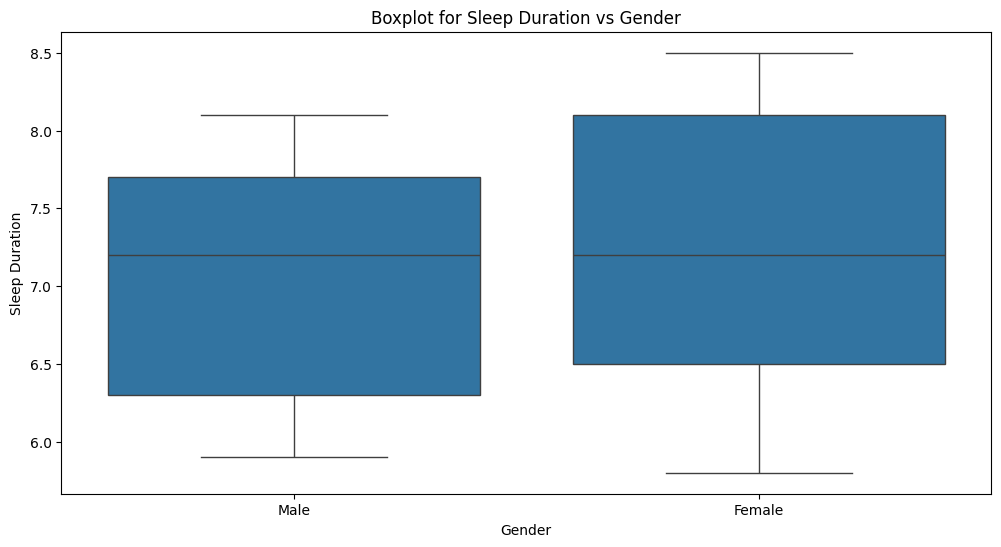

In [7]:
# Checking for outliers for both Gender using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='SleepDuration', data=df)
plt.title('Boxplot for Sleep Duration vs Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()

In [8]:
def OutliersCalculation(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    if outliers:
        return outliers
    else:
        return "No outliers to report"
    
OutliersCalculation(df['SleepDuration'])


'No outliers to report'

In [65]:
#Normality testing - Sleep Duration vs Gender

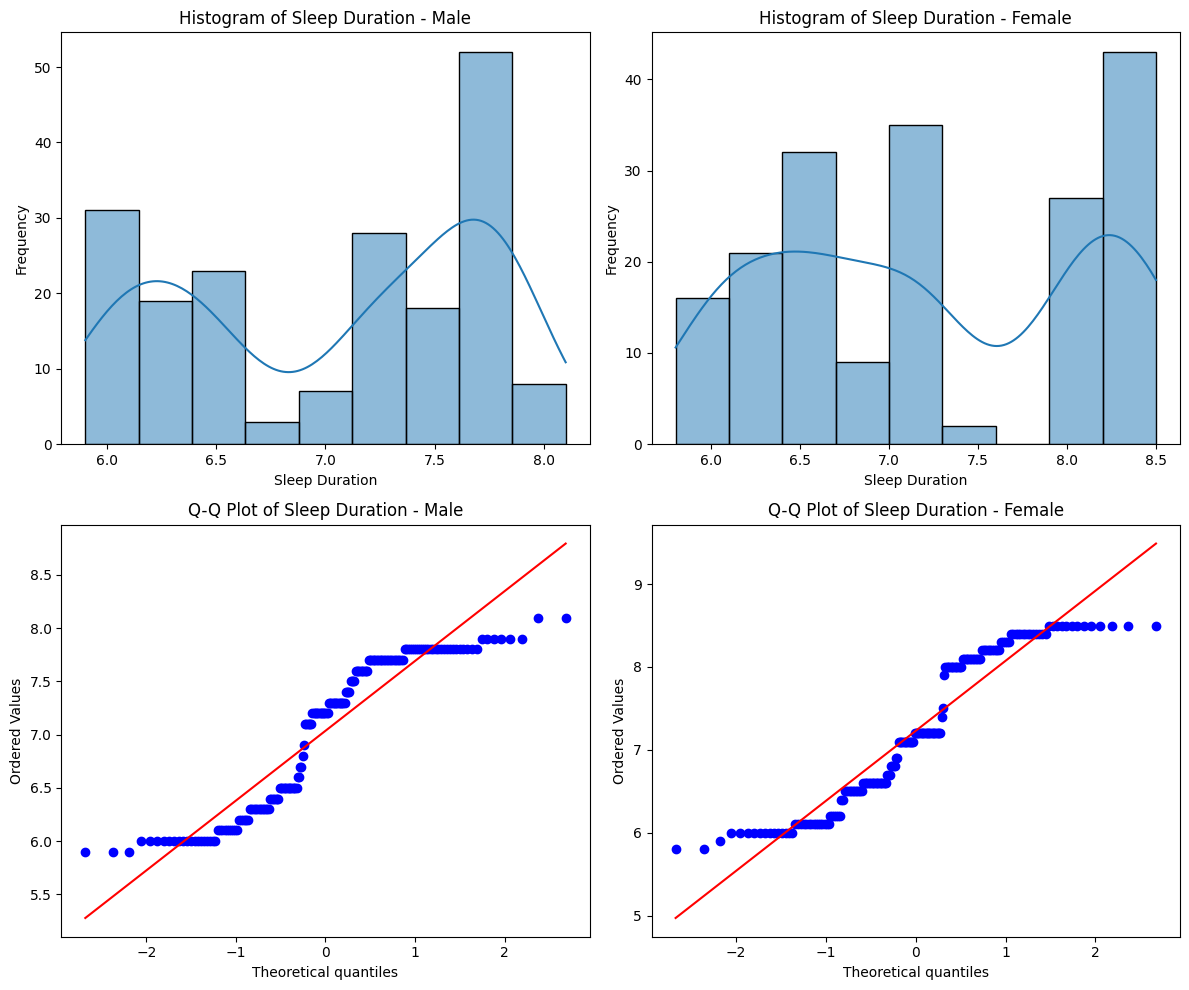

In [9]:

# Plot histogram and Q-Q plot for each group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for males
sns.histplot(df[df['Gender'] == 'Male']['SleepDuration'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Sleep Duration - Male')
axes[0, 0].set_xlabel('Sleep Duration')
axes[0, 0].set_ylabel('Frequency')

# Histogram for females
sns.histplot(df[df['Gender'] == 'Female']['SleepDuration'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Sleep Duration - Female')
axes[0, 1].set_xlabel('Sleep Duration')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plot for males
probplot(df[df['Gender'] == 'Male']['SleepDuration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Sleep Duration - Male')

# Q-Q plot for females
probplot(df[df['Gender'] == 'Female']['SleepDuration'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sleep Duration - Female')

plt.tight_layout()
plt.show()



In [10]:

# Perform Shapiro-Wilk test
stat_male, p_male = shapiro(df[df['Gender'] == 'Male']['SleepDuration'])
stat_female, p_female = shapiro(df[df['Gender'] == 'Female']['SleepDuration'])

rounded_p_male = round(p_male, 13)
rounded_p_female = round(p_female, 13)

print(f'Shapiro-Wilk test for males: Statistic={stat_male}, p-value={rounded_p_male}')
print(f'Shapiro-Wilk test for females: Statistic={stat_female}, p-value={rounded_p_female}')



Shapiro-Wilk test for males: Statistic=0.8724829881313924, p-value=1.51e-11
Shapiro-Wilk test for females: Statistic=0.8985763558917751, p-value=6.361e-10


In [ ]:
#Shapiro-Wilk Test (95 % confidence intervals): A p-value is less than 0.05 indicates that the data does significantly deviate from normality.

In [ ]:
#As per Shapiro-Wilk Test p-value is less than 0.05. To study SleepDuration vs Gender non-parametric U Mann Whitney was performed

In [18]:

sleep_male = df[df['Gender'] == 'Male']['SleepDuration']
sleep_female = df[df['Gender'] == 'Female']['SleepDuration']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(sleep_male, sleep_female)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in sleep duration between males and females.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in sleep duration between males and females.')

Statistic: 14929.5
P-value: 0.014440351736077347
Reject the null hypothesis: There is a significant difference in sleep duration between males and females.


In [ ]:
# As Chi sqaure Test is used to determine whether there is a relationship between two categorical variables,
# it was performed to study relathionship between Gender and Occupation

In [24]:
# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Occupation'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 274.1783404655569
P-value: 4.400429199364931e-53
Degrees of freedom: 10
Expected frequencies:
[[18.30213904 35.12032086 31.1631016  23.2486631   0.49465241 36.10962567
   0.98930481 15.82887701  1.97860963  1.97860963 19.78609626]
 [18.69786096 35.87967914 31.8368984  23.7513369   0.50534759 36.89037433
   1.01069519 16.17112299  2.02139037  2.02139037 20.21390374]]


In [ ]:
#Obtained p-value is extremely low, what indicates a statistically significant association between Gender and Occupation.

In [ ]:
#The high chi-square statistic indicates substantial association between Gender and Occupation choice.

In [ ]:
#Within the dataset we can observe that gender may influence or be associated with occupational roles.

In [12]:
df['SleepDisorders'] = df['SleepDisorder'].apply(lambda x: 'No' if x == 'None' else 'Yes')
df.head()

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder,MentalHealth,SleepDisorders
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Medium,Yes
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low,Yes
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low,Yes
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low,Yes
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low,Yes
